## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Define the system matrices

In [2]:
A = np.array([[0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0],
              [-10.0, 10.0, -2.0, 2.0],
              [60.0, -660.0, 12.0, -12.0]])
b1 = np.array([[0.0], [0.0], [0.0033], [-0.02]])
b2 = np.array([[0.0], [0.0], [0.0], [600.0]])
B = np.hstack((b1, b2))
C = np.array([[1.0, 0.0, 0.0, 0.0]])
D = np.array([[0.0]])

## Create the state space model of the active suspension system

In [3]:
active_suspension = signal.StateSpace(A, b2, C, D)  # Note only Second input is used

## Define the time vector

In [4]:
t = np.arange(0.0, 7.0, 0.01)

## Initial condition

In [5]:
x0 = np.array([0.2, 0.0, 0.0, 0.0])

## Simulate initial response

In [6]:
t, y, x = signal.lsim(active_suspension, U=np.zeros_like(t), T=t, X0=x0)

## Plot initial response

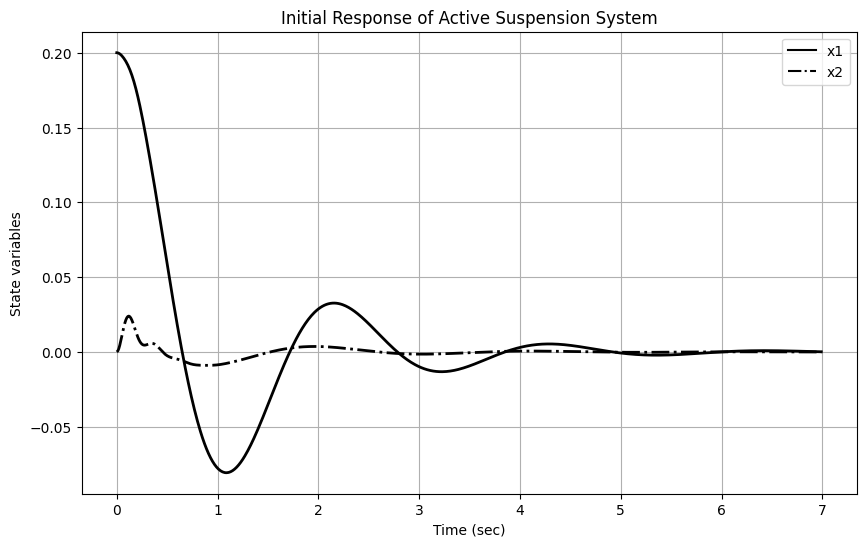

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0], 'k', label='x1')
plt.plot(t, x[:, 1], 'k-.', label='x2')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.title('Initial Response of Active Suspension System')
plt.show()

## Define input u

In [8]:
u = 0.1 * (np.sin(5.0 * t) + np.sin(9.0 * t) + np.sin(13.0 * t) + np.sin(17.0 * t) + np.sin(21.0 * t))

## Simulate the system with input u and initial condition x0=0

In [9]:
t, y, x = signal.lsim(active_suspension, U=u, T=t, X0=np.zeros_like(x0))

## Plot the result

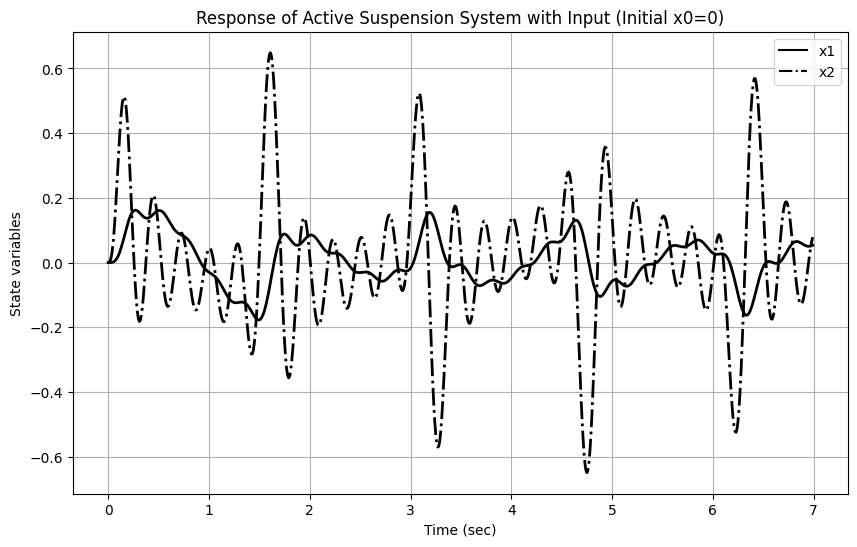

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0], 'k', label='x1')
plt.plot(t, x[:, 1], 'k-.', label='x2')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.title('Response of Active Suspension System with Input (Initial x0=0)')
plt.show()